WOP

In [London_Housing.ipynb](https://https://github.com/kohl-carmen/London-Housing/blob/main/London_Housing.ipynb), we had a first look at London property sales data. We found that there are large differences in house prices across the different boroughs.

Here, we will get new data to try to predict average housing prices per borough.

Data provided by [London Datastore](https://data.london.gov.uk/). 
[License](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/) terms apply.

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, we'll load data which may help us predict house prices per borough. For this, we'll select data with the following information per borough:
- Personal...
format them the same


Load Data: Personal well-being by borough ([data](https://data.london.gov.uk/dataset/subjective-personal-well-being-borough))

In [370]:
# - load & format data -
data_url = 'https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK_House_price_index.xlsx'
df_average_price = pd.read_excel(data_url, sheet_name = 'Average price',
                                 usecols = "A:AH, AJ, AK, AM:AU, AW")
df_average_price = df_average_price.drop(df_average_price.index[0])
# format date column and make it index
df_average_price.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df_average_price.Date = pd.to_datetime(df_average_price.Date)
df_average_price = df_average_price.set_index('Date')
# check for missing valuesdf_average_price_yr
df_average_price. isnull().values.any()
# express in thousands
df_average_price = df_average_price.div(1000)
# standardise string formatting
for key in df_average_price:
  if key.isupper():
    newkey = key[0] + key[1:].lower()
    if ' ' in key:
      for s in range(0,len(newkey)):
        if newkey[s].isspace():
          newkey = newkey[0:s+1] + newkey[s+1].upper() + newkey[s+2:]
    df_average_price = df_average_price.rename(columns={key: newkey})
rows, columns = df_average_price.shape
df_average_price = df_average_price.iloc[:,0:33]
df_average_price.head(5)

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-01-01,91.449,50.4602,93.2845,64.9581,71.3066,81.6715,120.933,69.1582,79.8859,72.5147,62.3001,61.2965,124.903,76.2876,84.7695,68.0001,73.8348,72.2317,92.5165,182.695,80.8758,67.771,60.4913,82.0706,53.5393,72.1896,109.326,67.8852,71.537,59.8652,61.3194,88.559,133.025
1995-02-01,82.2028,51.0858,93.1902,64.7879,72.0223,81.6576,119.509,68.9511,80.8971,73.1552,60.9933,63.1871,122.088,78.9012,83.3961,69.3935,75.0311,71.0516,94.3424,182.345,81.2301,65.3815,60.8693,79.9827,53.1539,72.1416,111.103,64.7991,70.8932,62.3185,60.2521,88.641,131.468
1995-03-01,79.1207,51.269,92.2475,64.3675,72.0158,81.4493,120.282,68.7124,81.3799,72.1904,61.3778,63.5933,120.636,78.5219,83.4162,69.368,74.1887,72.098,93.4659,182.879,81.1115,66.3365,60.288,80.6617,53.4583,72.5014,107.325,65.7633,70.3068,63.9387,60.8711,87.1248,132.26
1995-04-01,77.1012,53.1335,90.7629,64.2777,72.9656,81.1244,120.098,68.61,82.1889,71.4429,61.9277,65.1396,121.425,79.5456,83.5679,69.4443,73.9114,71.8903,93.3445,184.177,81.6728,66.3888,59.471,79.9905,54.4798,72.2286,106.875,63.0736,69.4119,66.2332,60.9714,87.026,133.37
1995-05-01,84.4091,53.0422,90.258,63.9971,73.704,81.5426,119.929,68.8449,82.0771,70.6308,63.513,66.194,124.434,79.374,83.8537,68.5345,73.1171,72.8775,94.3464,191.474,82.1235,69.0351,58.5514,80.874,55.804,72.3666,107.708,64.4205,69.7592,66.4329,61.4942,86.5181,133.911


In [371]:
# - load & format data -
data_url = 'https://data.london.gov.uk/download/subjective-personal-well-being-borough/d1bae8e8-f07b-4c2f-aec7-deed8006b52a/personal-well-being-borough.xlsx'
df_wellbeing = pd.read_excel(data_url, sheet_name = 'Summary - Mean Scores')

df_wellbeing = df_wellbeing.transpose()
df_wellbeing.columns = df_wellbeing.iloc[1,:]
df_wellbeing = df_wellbeing.rename(columns = {'Area': 'Date'}, inplace = False)

df_wellbeing = df_wellbeing.drop([' ', 'Unnamed: 1'])
df_wellbeing = df_wellbeing.dropna(axis=1, how = 'all')
df_wellbeing = df_wellbeing.iloc[0:8,0:34]
for i in range(0,len(df_wellbeing.Date)):
  df_wellbeing.Date[i] = pd.to_datetime(df_wellbeing.Date[i][0:4])
  df_wellbeing['City of London'][i] = np.nan
df_wellbeing = df_wellbeing.set_index('Date')
df_wellbeing.head(5)

Unnamed: 1,City of London,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,NaN,7.05,7.43,7.42,7.11,7.5,7.25,7.04,7.22,7.23,7.18,7,7.38,7.11,7.31,7.35,7.4,7.26,7.09,7.57,7.33,7.13,7.05,7.14,7.12,7.33,7.52,7.36,7.39,7.02,7.18,7.46,7.33
2012-01-01,NaN,7.09,7.28,7.42,7.28,7.6,7.24,7.01,7.22,7.24,7.15,7.07,7.21,7.17,7.37,7.36,7.37,7.35,7.14,7.7,7.17,7.08,7.23,7.18,7.23,7.3,7.4,7.21,7.28,7.32,7.24,7.26,7
2013-01-01,NaN,7.01,7.4,7.28,7.41,7.53,7.11,7.36,7.24,7.28,7.15,7.05,7.4,7.28,7.51,7.51,7.5,7.33,7.35,7.67,7.43,7.01,7.34,7.43,7.24,7.47,7.6,7.58,7.49,7.5,7.34,7.43,7.53
2014-01-01,NaN,7.32,7.54,7.52,7.24,7.71,7.25,7.35,7.6,7.45,7.33,7.43,7.56,7.38,7.49,7.62,7.63,7.57,7.36,7.65,7.52,7.41,7.33,7.64,7.54,7.55,7.54,7.43,7.6,7.54,7.64,7.47,7.45
2015-01-01,NaN,7.45,7.53,7.41,7.55,7.54,7.35,7.45,7.65,7.3,7.23,7.31,7.68,7.26,7.65,7.69,7.46,7.54,7.29,7.78,7.71,7.41,7.14,7.56,7.73,7.87,7.74,7.49,7.45,7.48,7.55,7.53,7.6


Load Data: Recorded Offences per borough ([data](https://data.london.gov.uk/dataset/recorded_crime_rates))

In [372]:
# - load & format data -
data_url = 'https://data.london.gov.uk/download/recorded_crime_rates/25f3c04c-898a-41c9-b911-93cac6df205f/met-police-recorded-offences-rates-borough.xlsx'
df_crime = pd.read_excel(data_url, sheet_name = 'Recorded Offences')
df_crime = df_crime.iloc[0:34,0:20]
df_crime = df_crime.transpose()
df_crime.columns = df_crime.iloc[1,:]
df_crime = df_crime.drop(['Unnamed: 0','Unnamed: 1'])
df_crime = df_crime.dropna(axis=1, how = 'all')
df_crime =df_crime.rename(columns = {'Borough': 'Date'})
for i in range(0,len(df_crime.Date)):
  df_crime.Date[i] = pd.to_datetime(df_crime.Date[i][0:4])
df_crime = df_crime.set_index('Date')
df_crime.head(5)

Unnamed: 1,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-01,19567,30708,20680,33253,26474,45800,37743,38737,28588,29991,39007,28600,34075,16777,18787,26281,31032,38427,30779,14649,52212,29628,16812,38335,24578,15504,43734,14493,34071,27035,35527,87615
2000-01-01,20253,30213,21072,32513,26142,46778,35221,38572,28019,28165,38242,28236,32799,17031,19761,26739,29034,35968,30714,14265,50950,27814,16569,38776,25226,14683,40447,13938,35070,25771,34756,83379
2001-01-01,20538,32274,21200,33276,28638,53103,37450,39128,29401,28995,39769,29487,37661,18217,21868,29074,29929,37611,29605,13811,57092,29008,17747,40616,28001,16057,45707,15359,37273,30260,35717,86270
2002-01-01,20394,34338,19752,33537,30276,53890,38618,40147,30042,31202,39267,30003,39017,19573,21537,29214,32842,39425,31921,14330,54188,28763,17880,41157,28737,16814,45960,14987,41124,32264,36204,86151
2003-01-01,22144,36288,20344,35837,30918,51016,37043,37927,29998,31347,39035,28650,36807,18430,22165,29349,30416,40816,29873,16309,49937,31577,18738,40615,28438,15446,46276,16154,39188,30912,33567,79296


Load Data: Borough Statistics ([data](https://data.london.gov.uk/dataset/london-borough-profiles))

- Population

- Area (hectares)


Note: these data are not longitudinal!

In [373]:
# - load & format data -
data_url = 'https://data.london.gov.uk/download/london-borough-profiles/80647ce7-14f3-4e31-b1cd-d5f7ea3553be/london-borough-profiles.xlsx'
df_area = pd.read_excel(data_url, sheet_name = 'Data',
                                 usecols = "C,E,G,AD,")
df_area = df_area.iloc[1:34]
df_area = df_area.transpose()
df_area.columns = df_area.iloc[0,:]
df_area = df_area.drop('Area name')
df_bdf_areaorough = df_area.iloc[0:2,:]
df_area.head(5)

Area name,City of London,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
GLA Population Estimate 2017,8800,209000,389600,244300,332100,327900,242500,386500,351600,333000,280100,274300,185300,278000,252300,254300,301000,274200,231200,159000,175400,328900,303400,208100,342900,304200,197300,314300,202600,304000,276200,321000,242100
Inland Area (Hectares),290.393,3610.78,8674.83,6058.07,4323.26,15013.5,2178.93,8650.36,5554.43,8083.2,4733.39,1904.9,1639.75,2959.84,5046.27,11235,11570.1,5597.79,1485.67,1212.4,3726.12,2681,3514.93,3762.47,3619.84,5641.9,5740.68,2886.2,4384.7,1978.13,3880.8,3426.42,2148.7
Employment rate (%) (2015),64.6,65.8,68.5,75.1,69.5,75.3,69.2,75.4,72.7,73,72.1,69,77.5,71.3,73.9,76.5,73.2,74.2,72.6,68.2,74.4,78.5,75.9,78.8,66.2,68.3,79.6,74.2,78.2,70.4,73.1,78.8,65.6


Load Data: Percentage of working households per borough ([data](https://data.london.gov.uk/dataset/workless-households-borough))

In [374]:
# - load & format data -
data_url = 'https://data.london.gov.uk/download/workless-households-borough/e38fa13b-eea2-425f-a97f-52f8f722e73d/workless-households-borough.xlsx'

df_work = pd.DataFrame(columns = df_crime.columns)
df_work['Date']=''
Date = []
for yr in range(2004, 2012+1):
  df_borough = pd.read_excel(data_url, sheet_name=str(yr), usecols = "B,D")
  df_borough = df_borough.iloc[3:36,:]
  df_borough = df_borough.transpose()
  df_borough.columns = df_borough.iloc[0,:]
  df_borough = df_borough.iloc[1,:]
  df_work = df_work.append(df_borough)
  Date.append(pd.to_datetime(str(yr)+'-01-01'))

df_work['Date'] = Date
df_work = df_work.set_index('Date')
df_work[df_work=='!']=np.nan
df_work.head(5)

Unnamed: 1,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,City of London
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,44.5,47.2,61.7,44.7,62,55.4,56.3,53.6,50.8,47.9,41.5,55.2,40.6,49.1,52.6,54.7,50.5,49.8,49.7,58.1,52.6,57.8,55.8,38.4,59.3,57.6,53.7,55.7,40.9,50.6,59.8,53.6,69.8
2005-01-01,45.0,53.8,57.8,43.0,64.6,49.0,57.4,49.8,44.3,48.6,40.4,54.3,49.3,51.4,51.7,51.8,55.2,49.5,51.0,56.6,50.9,55.5,52.4,38.0,46.7,59.0,49.2,63.2,44.2,50.5,54.9,47.6,51.5
2006-01-01,39.3,45.7,55.9,40.9,56.2,53.6,54.7,51.2,52.6,52.0,43.5,54.3,51.9,48.5,51.9,50.1,55.5,54.7,48.5,59.1,50.4,54.4,55.7,37.4,48.0,61.1,52.5,62.6,45.0,51.2,57.3,53.8,NaN
2007-01-01,45.1,48.0,51.7,43.7,62.2,56.5,55.7,50.3,46.9,49.8,49.8,55.6,50.5,50.8,55.3,45.9,52.1,57.8,51.7,57.1,55.9,54.6,59.4,41.4,48.0,60.4,53.7,57.8,48.9,51.6,58.9,51.7,77.6
2008-01-01,45.2,48.1,51.0,46.6,63.2,55.9,60.0,45.6,44.3,47.0,52.0,53.6,46.1,45.1,58.0,51.5,52.0,55.8,51.2,53.6,54.1,57.8,56.5,39.4,42.5,58.8,53.5,58.6,51.4,44.4,60.6,51.4,75.4


Load Data: Population per borough ([data](https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough))

In [375]:
# - load & format data -
data_url = 'https://data.london.gov.uk/download/land-area-and-population-density-ward-and-borough/cc4e7e08-3071-488f-bdd9-a62cb1ed1c5c/land-area-population-density-london.xlsx'
# load as separate dfs and join
df_pop1 = pd.read_excel(data_url, sheet_name=str('Borough staging'), 
                        usecols = "B,C,E")
df_pop2 = pd.read_excel(data_url, sheet_name=str('Borough staging'), 
                        usecols = "I,K,N")
df_pop2 = df_pop2.dropna(axis=0, how='any')
df_pop2 = df_pop2.rename(columns = {'Unnamed: 8':'Name',
                                    'Unnamed: 10':'Population',
                                    'Year.1':'Year'})
df_pop=pd.concat([df_pop1,df_pop2], axis=0)
df_pop = df_pop[df_pop.Year <= 2020] # delete future projections

# sort into df of matched format
date = pd.unique(df_pop.Year)
df_pop_format = pd.DataFrame(index = pd.unique(df_pop.Year), columns = pd.unique(df_pop.Name))
df_pop_format = df_pop_format.fillna(np.nan)
for row in range(0,len(df_pop)):
  this_borough = df_pop.Name.iloc[row]
  this_pop = df_pop.Population.iloc[row]
  this_year = df_pop.Year.iloc[row]
  row_index = np.argwhere(date==this_year)
  col_index = np.argwhere(df_pop_format.columns == this_borough) 
  df_pop_format.iloc[row_index[0],col_index[0]] = this_pop
df_pop_format = df_pop_format.drop(labels=['London','Inner London','Outer London'], axis=1)
# edit date
df_pop_format['Date']=''
for i in range(0,df_pop_format.shape[0]):
  df_pop_format.iloc[i,-1] = pd.to_datetime(str(int(df_pop_format.index[i]))+'0101')
df_pop_format = df_pop_format.set_index('Date')
df_pop = df_pop_format.copy()
df_pop.head(5)

,City of London,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-01,6581.0,162444.0,313469.0,217458.0,260317.0,294902.0,190003.0,332066.0,302252.0,272731.0,212168.0,199087.0,160634.0,218559.0,207909.0,225712.0,245053.0,214298.0,175717.0,147678.0,146003.0,266817.0,250310.0,185062.0,240517.0,238138.0,172782.0,247853.0,179375.0,193507.0,221057.0,264220.0,189233.0
2000-01-01,7681.0,163893.0,315784.0,218717.0,264945.0,295317.0,196174.0,334241.0,304370.0,275068.0,214438.0,203381.0,164393.0,219845.0,209114.0,225141.0,245911.0,214731.0,177852.0,154661.0,147328.0,270028.0,252106.0,188196.0,245463.0,239868.0,172920.0,252726.0,180485.0,197133.0,221296.0,267695.0,196478.0
2001-01-01,7359.0,212773.0,319481.0,218757.0,269620.0,296218.0,202567.0,335112.0,307276.0,277266.0,217460.0,207246.0,169374.0,221251.0,210044.0,224717.0,245616.0,215976.0,179387.0,162199.0,149045.0,273372.0,254336.0,191106.0,249411.0,241893.0,174311.0,256712.0,181461.0,201090.0,222015.0,271742.0,203329.0
2002-01-01,7280.0,166357.0,397049.0,219123.0,269871.0,296668.0,203972.0,335415.0,309242.0,280745.0,221476.0,210961.0,171989.0,224474.0,212336.0,225054.0,247063.0,216888.0,180118.0,163827.0,149642.0,273041.0,253662.0,190561.0,255282.0,244273.0,175441.0,256269.0,181265.0,207031.0,223776.0,274917.0,208100.0
2003-01-01,7115.0,166210.0,321802.0,249999.0,268323.0,297253.0,204254.0,335919.0,308108.0,281835.0,224303.0,212405.0,171510.0,225027.0,213728.0,225248.0,248054.0,216498.0,180899.0,165268.0,149683.0,272195.0,251936.0,189298.0,256224.0,247412.0,177182.0,255242.0,181267.0,208651.0,224115.0,276828.0,211009.0


In [417]:
# delete borough if is missing entirely or has missing values in any set
#check for missign boroughs
boroughs_to_delete = []
check_df =['df_wellbeing','df_crime','df_area','df_work','df_pop','df_average_price']
cols = df_average_price.shape[1]
for df_str in check_df:
  df = eval(df_str)
  if df.shape[1] != cols:
    for borough in df_average_price:
      if borough not in df:
        boroughs_to_delete.append(borough)

# check for missing values
for df_str in check_df:
  df = eval(df_str)
  for borough in df:
     if sum(df[borough].isna()) > 0:
       boroughs_to_delete.append(borough)

boroughs_to_delete = np.unique(boroughs_to_delete)

def delete_missing_vals(df,boroughs_to_delete):
  for delete in boroughs_to_delete:
    delete = str(delete)
    if delete in df:
      df = df.drop([delete], axis=1)
  return df

df_average_price = delete_missing_vals(df_average_price,boroughs_to_delete)
df_pop = delete_missing_vals(df_pop,boroughs_to_delete)
df_wellbeing = delete_missing_vals(df_wellbeing,boroughs_to_delete)
df_crime = delete_missing_vals(df_crime,boroughs_to_delete)
df_work = delete_missing_vals(df_work,boroughs_to_delete)
df_area = delete_missing_vals(df_area,boroughs_to_delete)

Unnamed: 1,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,7.05,7.43,7.42,7.11,7.5,7.25,7.04,7.22,7.23,7.18,7,7.38,7.11,7.31,7.35,7.4,7.26,7.09,7.57,7.33,7.13,7.05,7.14,7.12,7.33,7.52,7.36,7.39,7.02,7.18,7.46,7.33
2012-01-01,7.09,7.28,7.42,7.28,7.6,7.24,7.01,7.22,7.24,7.15,7.07,7.21,7.17,7.37,7.36,7.37,7.35,7.14,7.7,7.17,7.08,7.23,7.18,7.23,7.3,7.4,7.21,7.28,7.32,7.24,7.26,7
2013-01-01,7.01,7.4,7.28,7.41,7.53,7.11,7.36,7.24,7.28,7.15,7.05,7.4,7.28,7.51,7.51,7.5,7.33,7.35,7.67,7.43,7.01,7.34,7.43,7.24,7.47,7.6,7.58,7.49,7.5,7.34,7.43,7.53
2014-01-01,7.32,7.54,7.52,7.24,7.71,7.25,7.35,7.6,7.45,7.33,7.43,7.56,7.38,7.49,7.62,7.63,7.57,7.36,7.65,7.52,7.41,7.33,7.64,7.54,7.55,7.54,7.43,7.6,7.54,7.64,7.47,7.45
2015-01-01,7.45,7.53,7.41,7.55,7.54,7.35,7.45,7.65,7.3,7.23,7.31,7.68,7.26,7.65,7.69,7.46,7.54,7.29,7.78,7.71,7.41,7.14,7.56,7.73,7.87,7.74,7.49,7.45,7.48,7.55,7.53,7.6
2016-01-01,7.5,7.47,7.46,7.67,7.6,7.56,7.68,7.42,7.29,7.28,7.26,7.47,7.56,7.64,7.53,7.68,7.96,7.38,7.52,7.69,7.35,7.18,7.62,7.61,7.57,7.71,7.37,7.66,7.75,7.67,7.64,7.68
2017-01-01,7.66,7.63,7.42,7.79,7.31,7.31,7.49,7.55,7.34,7.47,7.34,7.34,7.6,7.79,7.58,7.55,7.34,7.38,7.31,7.6,7.42,7.31,7.55,7.47,7.55,7.73,7.47,7.91,7.51,7.73,7.64,7.57
2018-01-01,7.52,7.55,7.54,7.71,7.57,7.48,7.69,7.53,7.37,7.54,7.5,7.72,7.35,7.65,7.68,7.76,7.85,7.51,7.23,7.78,7.22,7.49,7.84,7.54,7.54,7.7,7.34,7.88,7.82,7.46,7.65,7.66


In [417]:
# Match spelling of boroughs
def rename_borough(df):
  for borough in df:
    if '&' in borough:
      index = borough.find('&')
      new_label = borough[0:index]+'and'+borough[index+1:]
      df = df.rename(columns={borough: new_label})
    df = df.sort_index(axis=1)
  return df

df_average_price = rename_borough(df_average_price)
df_pop = rename_borough(df_pop)
df_wellbeing = rename_borough(df_wellbeing)
df_crime = rename_borough(df_crime)
df_work = rename_borough(df_work)
df_area = rename_borough(df_area)

In [417]:
# check column matching
check_df =['df_wellbeing','df_crime','df_area','df_work','df_pop']
for col in range(0,df_average_price.shape[1]):
  borough = df_average_price.columns[col]
  for df in check_df:
    if eval(df).columns[col] != borough:
      print(df)
      print(borough)

In [417]:
# match dates (most data sets only have one record per year)
# take mean per year in price data to match
df_average_price_yr = pd.DataFrame(columns=df_average_price.columns)
for yr in range(min(df_average_price.index).year,
                max(df_average_price.index).year+1):
  add = {};
  add.update({'Year':yr})
  for region in df_average_price:
    sales = df_average_price[region][df_average_price[region].index.year == yr].mean()
    add.update({region:sales})
  df_average_price_yr = df_average_price_yr.append(add,ignore_index=True)
df_average_price_yr = df_average_price_yr.set_index('Year')
df_average_price_yr['Date'] = ''
for i in range(0,df_average_price_yr.shape[0]):
  floatyear = df_average_price_yr.index[i]
  df_average_price_yr.iloc[i,-1] = pd.to_datetime(str(int(floatyear))+'0101')
df_average_price_yr = df_average_price_yr.set_index('Date')
df_average_price = df_average_price_yr.copy()
 

In [418]:
# check available dates
check_df =['df_average_price','df_wellbeing','df_crime','df_work','df_pop']
for df_str in check_df:
  df = eval(df_str)
  print(df_str+': '+ str(df.shape[0])+ ' samples between ' + 
        str(df.index.year.min()) + ' and '+ str(df.index.year.max()))

df_average_price: 26 samples between 1995 and 2020
df_wellbeing: 8 samples between 2011 and 2018
df_crime: 18 samples between 1999 and 2016
df_work: 9 samples between 2004 and 2012
df_pop: 22 samples between 1999 and 2020


Now that we have loaded all the data, we'll plot each set to check that everything looks sensible

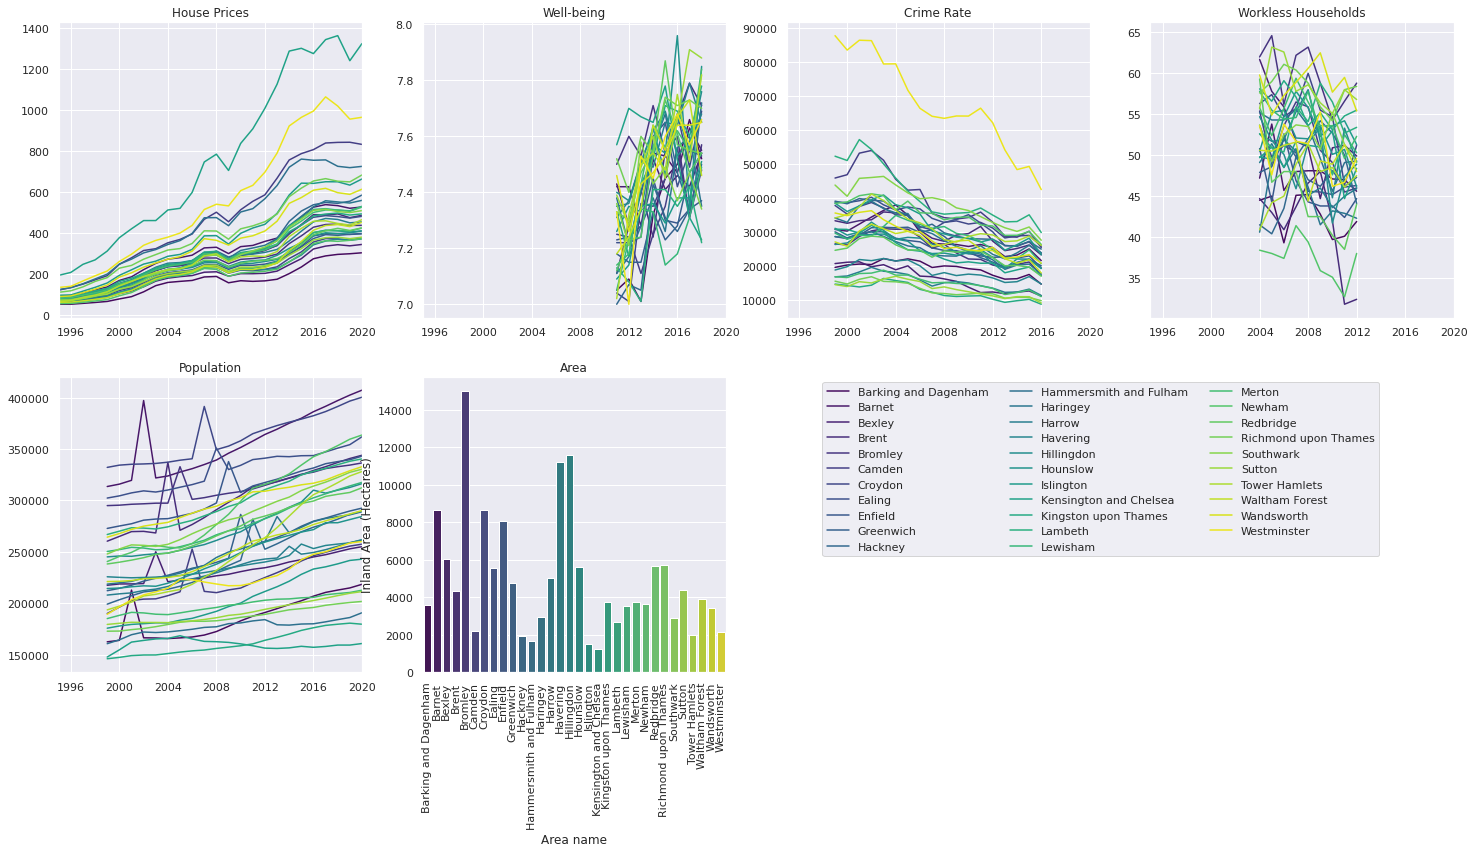

In [419]:
def plot_all(df):
  count=0
  my_cmap = sns.color_palette('viridis', n_colors = len(list(df)))
  for borough in df:
    plt.plot(df[borough], color = my_cmap[count])
    count += 1

sns.set(rc={'figure.figsize':(25,25)})
cont_df = ['df_average_price','df_wellbeing','df_crime','df_work','df_pop']
df_titles = ['House Prices','Well-being','Crime Rate','Workless Households','Population']

count=0

for df_str in cont_df:
  df = eval(df_str)
  count += 1
  plt.subplot(4,4,count)
  plot_all(df)
  plt.title(df_titles[count-1])
  plt.xlim([pd.to_datetime(str(1995)+'0101'),pd.to_datetime(str(2020)+'0101')])
plt.legend(df.columns,bbox_to_anchor=(2.5, 1),ncol = 3, loc='upper left')

plt.subplot(4,4,count+1)
bars = sns.barplot(x=df_area.columns,y=df_area.iloc[1,:], palette='viridis')
bars.set_title('Area')
_ = bars.set_xticklabels(bars.get_xticklabels(),rotation=90)


In [ ]:
# check correlations between data and target
for borough